In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import QuantileRegressor
from sklearn.datasets import fetch_california_housing

In [31]:
data = fetch_california_housing()
x = data.data[:, [3]]

In [17]:
y = data.target

In [18]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [12]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Prices
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [13]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()
dfScale=scaler.fit_transform(x)

In [22]:
quantiles = [0.1, 0.5, 0.9]
colors = ['pink','purple','red']
labels = ['10th percentile', '50th percentile (median)', '90th percentile']

In [34]:
models = []
for q in quantiles:
    qr = QuantileRegressor(quantile=q,alpha=0)
    qr.fit(dfScale,y)
    models.append(qr)

In [35]:
models

[QuantileRegressor(alpha=0, quantile=0.1),
 QuantileRegressor(alpha=0),
 QuantileRegressor(alpha=0, quantile=0.9)]

In [36]:
xtest = np.linspace(dfScale.min(),dfScale.max(),100).reshape(-1,1)
preds = [model.predict(xtest) for model in models]

In [37]:
preds

[array([ 0.97956495,  0.91124877,  0.84293258,  0.77461639,  0.70630021,
         0.63798402,  0.56966783,  0.50135165,  0.43303546,  0.36471928,
         0.29640309,  0.2280869 ,  0.15977072,  0.09145453,  0.02313835,
        -0.04517784, -0.11349403, -0.18181021, -0.2501264 , -0.31844258,
        -0.38675877, -0.45507496, -0.52339114, -0.59170733, -0.66002352,
        -0.7283397 , -0.79665589, -0.86497207, -0.93328826, -1.00160445,
        -1.06992063, -1.13823682, -1.206553  , -1.27486919, -1.34318538,
        -1.41150156, -1.47981775, -1.54813394, -1.61645012, -1.68476631,
        -1.75308249, -1.82139868, -1.88971487, -1.95803105, -2.02634724,
        -2.09466342, -2.16297961, -2.2312958 , -2.29961198, -2.36792817,
        -2.43624435, -2.50456054, -2.57287673, -2.64119291, -2.7095091 ,
        -2.77782529, -2.84614147, -2.91445766, -2.98277384, -3.05109003,
        -3.11940622, -3.1877224 , -3.25603859, -3.32435477, -3.39267096,
        -3.46098715, -3.52930333, -3.59761952, -3.6

In [42]:
import matplotlib.pyplot as plt

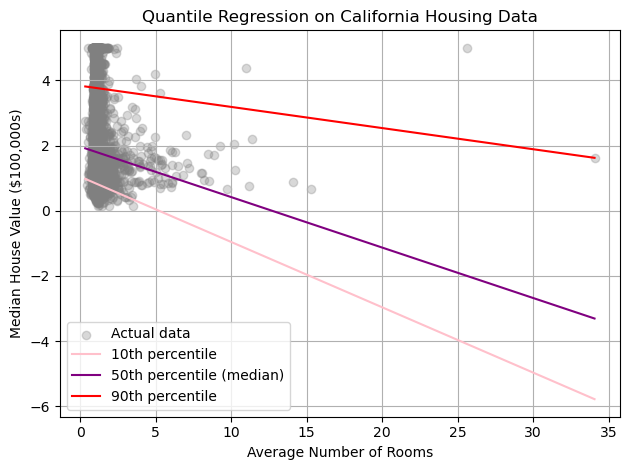

In [44]:
plt.scatter(x, y, color='gray', alpha=0.3, label='Actual data')
for i in range(3):
    plt.plot(scaler.inverse_transform(xtest), preds[i], color=colors[i], label=labels[i])
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value ($100,000s)')
plt.title('Quantile Regression on California Housing Data')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()